# Welcome to the FabSim3 automation toolkit tutorial

[FabSim3](https://fabsim3.readthedocs.io/en/latest/) is a Python-based automation toolkit for scientific simulation and data processing workflows, licensed under the BSD 3-clause license. It is a component of the [VECMA Toolkit](http://www.vecma-toolkit.eu), which is developed as a part of the [VECMA](http://www.vecma.eu) project funded by the European Union Horizon 2020 research and innovation programme.

FabSim3 supports the use of simple one-liner commands to:

- Organize input, output and environment information, creating a consistent log and making it possible by default to repeat/reproduce runs.
- Establish and run coupled models using the workflow automation functionalities.
- Perform large ensemble simulations (or replicated ones) using a one-line command.
- Enable the execution of simulation and analysis tasks on supercomputers.

Users can perform complex remote tasks from a local command-line, and run single jobs, ensembles of multiple jobs, and dynamic workflows through schedulers such as SLURM, Portable Batch System Professional (PBSPro), LoadLeveller and Quality in Cloud and Grid [(QCG)](http://www.qoscosgrid.org/trac/qcg). FabSim3 stores machine-specific configurations in the repository, and applies it to all applications run on that machine. These configurations are updated by any contributor who feels that a fix or improvement is required.

## Intalling FabSim3 

To install [FabSim3](https://github.com/djgroen/FabSim3), clone the repository using:

In [1]:
%%bash

if [ ! -d "FabSim3" ]
then
    git clone https://github.com/djgroen/FabSim3
    echo "FabSim3 rep cloned in -> " $PWD
else
    git -C FabSim3 pull
    echo "updating FabSim3 rep cloned in -> " $PWD
fi

FabSim3 rep cloned in ->  /home/csstdds/Codes/VECMA-tutorials/FabSim3


Cloning into 'FabSim3'...


### Setup ssh key

To setup ssh connection for executing jobs on localhost, simply run:

In [2]:
%%bash

if [ ! -f ~/.ssh/id_rsa ]; then
    ssh-keygen -t rsa -N "" -f ~/.ssh/id_rsa
else
    echo "SSH key already exists"
fi
cat ~/.ssh/id_rsa.pub >> ~/.ssh/authorized_keys
chmod og-wx ~/.ssh/authorized_keys
ssh-keyscan -H localhost >> ~/.ssh/known_hosts

SSH key already exists


# localhost:22 SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.5
# localhost:22 SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.5
# localhost:22 SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.5


### Dependencies

FabSim3 relies strongly on the following Python modules:

- [Fabric](http://www.fabfile.org) (shown to work with versions 1.5.3 and 1.10.0), 
- [PyYAML](https://pypi.org/project/PyYAML/) (any version), 
- [ruamel.yaml](https://pypi.org/project/ruamel.yaml/)
- [numpy](https://numpy.org/install/) and
- [cryptography](https://pypi.org/project/cryptography/).

These dependencies are marked down in the `requirements.txt` file, as

`fabric3==1.13.1.post1, 
 pyyaml, 
 pytest, 
 pytest-pep8, 
 ruamel.yaml, 
 numpy, 
 cryptography`
 
To install requitements.txt, simply run the following:

In [3]:
%%bash

# Install required Python modules
pip install -r FabSim3/requirements.txt

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Configure `machine_user.yml` file

To set personal configurations, copy `machines_user_example.yml` as `machines_user.yml` in the `FabSim3/deploy` folder and run the following sequence of commands, which will change `localhost:` configurations:


In [4]:
%%bash

PORT=22

# Configure machines_user.yml
cp FabSim3/fabsim/deploy/machines_user_example.yml FabSim3/fabsim/deploy/machines_user.yml

# Defines your username from local configuration
sed -i "s/your-username/`whoami`/g" FabSim3/fabsim/deploy/machines_user.yml

# Defines port number for localhost connection
sed -i "s#localhost:#localhost:\n  port: $PORT#g" FabSim3/fabsim/deploy/machines_user.yml

# Defines working directory for configs and results directories
sed -i "s#localhost:#localhost:\n  local_configs: \"$PWD/FabSim3/config_files\"#g" FabSim3/fabsim/deploy/machines_user.yml
sed -i "s#localhost:#localhost:\n  local_results: \"$PWD/FabSim3/results\"#g" FabSim3/fabsim/deploy/machines_user.yml

# Defines home path for execution
sed -i "s#localhost:#localhost:\n  home_path_template: \"$PWD/FabSim3/localhost_exe\"#g" FabSim3/fabsim/deploy/machines_user.yml

To view the changes made in the `machines_user.yml` file, simply run:

In [5]:
import yaml

machines_user_yml = yaml.load(open("FabSim3/fabsim/deploy/machines_user.yml"), Loader=yaml.FullLoader)
print(yaml.dump({'localhost': machines_user_yml['localhost']}))


localhost:
  home_path_template: /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/localhost_exe
  local_configs: /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/config_files
  local_results: /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/results
  port: 22
  username: csstdds



### Add FabSim3 to your PATH and PYTHONPATH

To add FabSim3 executable file to system `PATH` and setup `PYTHONPATH`:

In [6]:
import os
import sys

# print(os.environ['PATH'])
sys.path.insert(0,  r'%s/FabSim3/fabsim/bin' %(os.getcwd()))
sys.path.insert(0,  r'%s/FabSim3/fabsim/' %(os.getcwd()))
os.environ['PATH']=r'%s/FabSim3/fabsim/bin' %(os.getcwd())+os.pathsep+os.environ['PATH']

# Test if fabsim command is availble
!which fabsim

/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/fabsim/bin/fabsim


## FabSim3 plugins

FabSim3 contains an integrated test infrastructure, more flexible customisation options using a plugin system and  examples to improve usability. These plugins will be installed in the `FabSim3/plugins` directory.

### Dummy instance - FabDummy plugin

To demonstrate the use of FabSim3 plugin, install the [FabDummy](https://github.com/djgroen/FabDummy) plugin  by running `install_plugin` command:

In [7]:
%%bash

cd FabSim3

# Install FabDummy
fabsim localhost install_plugin:FabDummy

[Executing task] install_plugin
[local] mkdir -p /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins
[local] rm -rf /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabDummy
[local] git clone https://github.com/djgroen/FabDummy.git /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabDummy
FabDummy plugin installed...


Cloning into '/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabDummy'...


#### Running FabDummy test

To test the FabDummy plugin, run a dummy job using:

In [8]:
%%bash

cd FabSim3

# Execute a dummy test job
fabsim localhost dummy:dummy_test

sending incremental file list
./
dummy.txt
SWEEP/
SWEEP/d1/
SWEEP/d1/dummy.txt
SWEEP/d2/
SWEEP/d2/dummy.txt
SWEEP/d3/
SWEEP/d3/dummy.txt

sent 630 bytes  received 119 bytes  1.50K bytes/sec
total size is 242  speedup is 0.32
[loading plugin] FabDummy ...
[Executing task] dummy
[local] ssh -Y -p 22 csstdds@localhost 'mkdir -p /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/localhost_exe/FabSim/config_files; mkdir -p /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/localhost_exe/FabSim/results; mkdir -p /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/localhost_exe/FabSim/scripts; mkdir -p /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/localhost_exe/FabSim/config_files/dummy_test'
[rsync_project] rsync  --exclude={'file1.txt','dir1/*','dir2'} -pthrvz --rsh='ssh -p 22 ' /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabDummy/config_files/dummy_test/ csstdds@localhost:/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/localhost_exe/FabSim/config_files/dummy_tes

### Migration Modelling - FabFlee plugin

The [FabFlee](https://github.com/djgroen/FabFlee) plugin  aims to automate the construction, execution and analysis of Flee, which is an agent-based modelling toolkit purpose-built for simulating the movement of individuals across geographical locations. An agent-based Flee simulation code is written in Python. For detailed information, see [Flee](https://flee.readthedocs.io/en/latest/index.html#) documentation.

To install Flee, clone the repository by running:

In [9]:
%%bash

# Clone the Flee repository
if [ ! -d "flee" ]
then
    git clone -b master https://github.com/djgroen/flee.git
    echo "flee rep cloned in -> " $PWD
else
    git -C flee pull
    echo "updating flee rep cloned in -> " $PWD
fi

flee rep cloned in ->  /home/csstdds/Codes/VECMA-tutorials/FabSim3


Cloning into 'flee'...


#### Installing required python modules for Flee 

To install all required Python packages, simply install:

In [10]:
!pip install pandas matplotlib numpy mpi4py

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


#### Installing FabFlee

A FabSim3-based FabFlee plugin provides an environment for researchers and organisations to construct and modify simulations, instantiate and execute multiple runs for different policy decisions, as well as to validate and visualise the obtained results against the existing data.

To install FabFlee, run `install_plugin` function using:

In [11]:
%%bash

cd FabSim3

# Install FabFlee 
fabsim localhost install_plugin:FabFlee

[loading plugin] FabDummy ...
[Executing task] install_plugin
[local] mkdir -p /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins
[local] rm -rf /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee
[local] git clone https://github.com/djgroen/FabFlee.git /home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee
FabFlee plugin installed...


Cloning into '/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee'...
Checking out files: 100% (1053/1053), done.


#### Adding the Flee directory location to your machine_user.yml file

Since FabFlee is a plugin for the Flee simulation code, add the current location of the Flee directory to the `machines_user.yml` configuration file:

In [12]:
%%bash

PORT=22

# Configure machines_FabFlee_user.yml
cp FabSim3/plugins/FabFlee/machines_FabFlee_user_example.yml FabSim3/plugins/FabFlee/machines_FabFlee_user.yml

In [13]:
!sed -i  "s#<PATH_TO_FLEE>#$PWD/flee#g" FabSim3/plugins/FabFlee/machines_FabFlee_user.yml

To view changes in `machines_user.yml`, simply run the following

In [14]:
machines_user_yml = yaml.load(open("FabSim3/plugins/FabFlee/machines_FabFlee_user.yml"), Loader=yaml.FullLoader)

print(yaml.dump({'localhost': machines_user_yml['localhost']}))


localhost:
  FLEE_TYPE_CHECK: true
  cityGraph_API_KEY: 5b3ce3597851110001cf62481fe17f28d29945ecb2ca9d2f51f12738
  cityGraph_CITIES_LIMIT: ''
  cityGraph_COUNTRY_CODE: ''
  cityGraph_POPULATION_LIMIT: ''
  cityGraph_location: ~/Codes/citygraph
  flare_location: <PATH_TO_FLARE>
  flee_location: /home/csstdds/Codes/VECMA-tutorials/FabSim3/flee



#### Executing a migration conflict scenario

To execute FabFlee job on a localhost, execute one of the conflict instances using `flee` function in `FabSim3/plugins/FabFlee/config_files`, such as Mali (mali, simulation period of 300 days), Burundi (burundi, simulation period of 396 days), South Sudan (ssudan, simulation period of 604 days) and Central African Republic (car, simulation period of 820 days). 

For illustration purposes, the conflict scenario of Mali is executed to obtain the simulation output for a simulation period of 50 days, which can be changed up to 300 days.

In [15]:
%%bash

cd FabSim3

fabsim localhost flee:mali,simulation_period=50

[loading plugin] FabFlee ...
Error: failed to import settings module flee_SA
<class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'chaospy'")
The FabFlee flee_SA functionalities are not imported as a result.
Error: failed to import settings module flee_vvp
<class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'easyvvuq'")
The FabFlee flee_vvp functionalities are not imported as a result.
[loading plugin] FabDummy ...
[Executing task] flee
calling task flee from plugin FabFlee
╭─ New/Updated environment variables from FabFlee plugin ─╮
│ env :                                                   │
│   +++ UNHCR_uncertainty is a new added key              │
│ env :                                                   │
│   +++ FLEE_TYPE_CHECK is a new added key                │
│ env :                                                   │
│   +++ flee_location is a new added key                  │
│ env :                                                   │
│   +++ flar

  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/FabFlee.py", line 1415, in <module>
    from plugins.FabFlee.SA.flee_SA import flee_init_SA
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/SA/flee_SA.py", line 6, in <module>
    import chaospy as cp
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/FabFlee.py", line 1429, in <module>
    from plugins.FabFlee.VVP.flee_vvp import flee_init_vvp_LoR
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/VVP/flee_vvp.py", line 21, in <module>
    import easyvvuq as uq
Location name: Kidal, X: 18.444305, Y: 1.401523, movechance: 1.0, cap: -1, pop: 25617, country: Mali, conflict? True, camp? False
Location name: Timbuktu, X: 16.78026, Y: -3.00159, movechance: 1.0, cap: -1, pop: 54453, country: Mali, conflict? True, camp? False
Location name: Niafounke, X: 15.9316, Y: -3.9908, movechance: 1.0, cap: -1, pop: 1000, country: Mali, conflict? True,

#### Fetching the simulation results to `FabSim3/results` directory

After the job has finished, a message will be printed indicating where the output data resides. To fetch and copy the obtained results to `FabSim3/results` directory, simply execute:

In [16]:
%%bash

cd FabSim3

fabsim localhost fetch_results

receiving incremental file list
./
dummy_test_localhost_16/
dummy_test_localhost_16/dummy.txt
dummy_test_localhost_16/dummy_test_localhost_16.sh
dummy_test_localhost_16/env.log
dummy_test_localhost_16/env.yml
mali_localhost_16/
mali_localhost_16/acled.csv
mali_localhost_16/env.log
mali_localhost_16/env.yml
mali_localhost_16/mali_localhost_16.sh
mali_localhost_16/out.csv
mali_localhost_16/run.py
mali_localhost_16/run_UNHCR_uncertainty.py
mali_localhost_16/run_par.py
mali_localhost_16/simsetting.csv
mali_localhost_16/example_sweepdir/
mali_localhost_16/example_sweepdir/100/
mali_localhost_16/example_sweepdir/100/simsetting.csv
mali_localhost_16/example_sweepdir/200/
mali_localhost_16/example_sweepdir/200/simsetting.csv
mali_localhost_16/example_sweepdir/400/
mali_localhost_16/example_sweepdir/400/simsetting.csv
mali_localhost_16/input_csv/
mali_localhost_16/input_csv/closures.csv
mali_localhost_16/input_csv/conflict_period.csv
mali_localhost_16/input_csv/conflicts.csv
mali_localhost_16/i

  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/FabFlee.py", line 1415, in <module>
    from plugins.FabFlee.SA.flee_SA import flee_init_SA
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/SA/flee_SA.py", line 6, in <module>
    import chaospy as cp
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/FabFlee.py", line 1429, in <module>
    from plugins.FabFlee.VVP.flee_vvp import flee_init_vvp_LoR
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/VVP/flee_vvp.py", line 21, in <module>
    import easyvvuq as uq


#### Plotting the simulation output

After fetching the simulation results, analyse and interpret simulation output by plotting graphs for individual camps comparing simulation output and UNHCR data, as well as average relative difference graph for the simulated conflict situation.

In [17]:
%%bash

cd FabSim3

fabsim localhost plot_output:mali_localhost_16,out

[loading plugin] FabFlee ...
Error: failed to import settings module flee_SA
<class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'chaospy'")
The FabFlee flee_SA functionalities are not imported as a result.
Error: failed to import settings module flee_vvp
<class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'easyvvuq'")
The FabFlee flee_vvp functionalities are not imported as a result.
[loading plugin] FabDummy ...
[Executing task] plot_output
calling task plot_output from plugin FabFlee
╭─ New/Updated environment variables from FabFlee plugin ─╮
│ env :                                                   │
│   +++ UNHCR_uncertainty is a new added key              │
│ env :                                                   │
│   +++ FLEE_TYPE_CHECK is a new added key                │
│ env :                                                   │
│   +++ flee_location is a new added key                  │
│ env :                                                   

  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/FabFlee.py", line 1415, in <module>
    from plugins.FabFlee.SA.flee_SA import flee_init_SA
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/SA/flee_SA.py", line 6, in <module>
    import chaospy as cp
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/FabFlee.py", line 1429, in <module>
    from plugins.FabFlee.VVP.flee_vvp import flee_init_vvp_LoR
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/VVP/flee_vvp.py", line 21, in <module>
    import easyvvuq as uq


To list generated plots, run the following command:

In [18]:
%%bash

cd FabSim3/results/mali_localhost_16
ls

acled.csv
env.log
env.yml
example_sweepdir
input_csv
mali_localhost_16.sh
out
out.csv
run_par.py
run.py
run_UNHCR_uncertainty.py
simsetting.csv
source_data


To view generated plots, simply run:

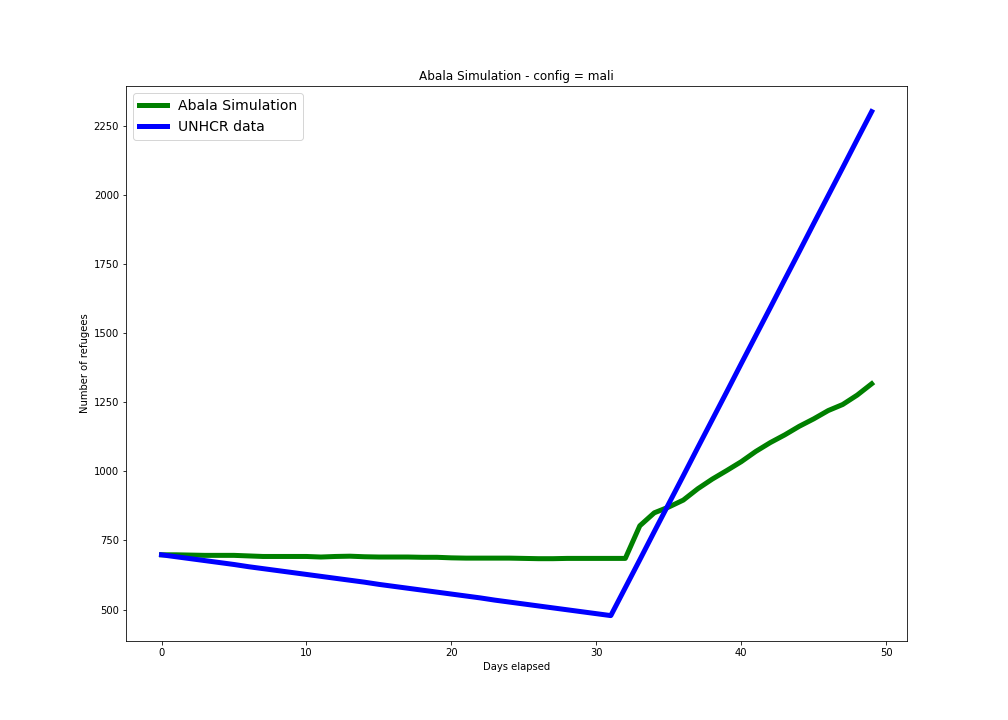

In [19]:
from IPython.display import Image 
Image('FabSim3/results/mali_localhost_16/out/camps/Abala.png')

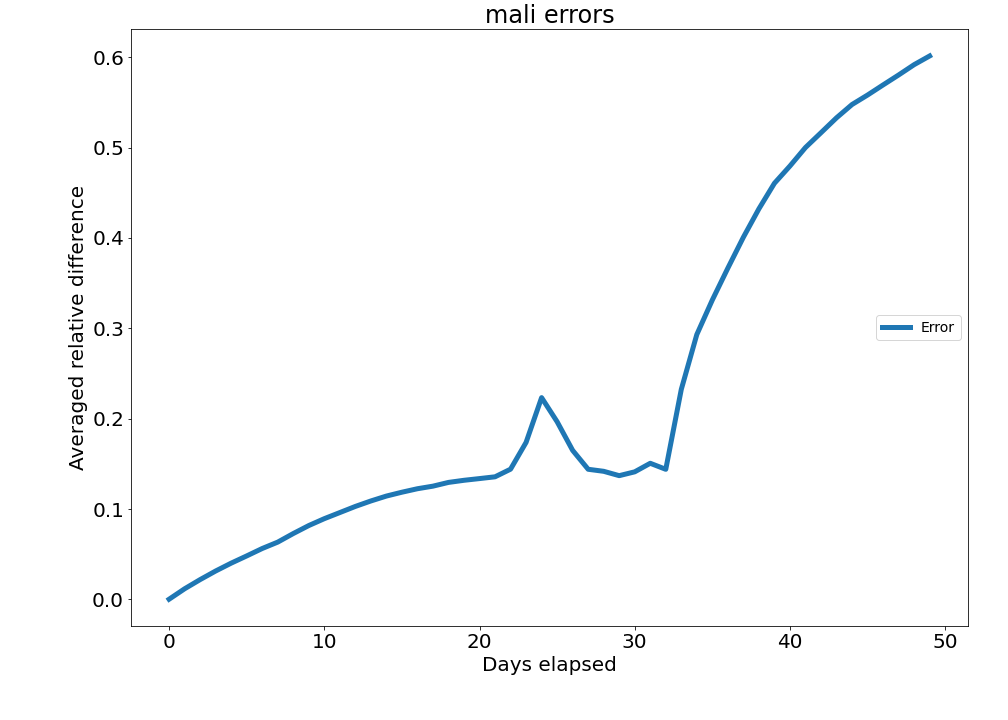

In [20]:
from IPython.display import Image 
Image('FabSim3/results/mali_localhost_16/out/errors/error.png')

## Automated Autovalidator

There are several simulation instances including different conflict countries and simulation periods in `FabFlee/config_files`. These instances can be executed, analysed and validated using FabFlee (as shown in the previous steps). Importantly, multiple conflict scenarios can be also executed at once for validation purposes. To perform autovalidation on constructed conflict models, simply go to `FabFlee/config_files/validation/SWEEP` directory and list existing conflicts:

In [21]:
%%bash

cd FabSim3/plugins/FabFlee/config_files/validation/SWEEP

ls

burundi2015
car2013
ethiopia2020
mali2012
nigeria2016
ssudan2013
ssudan2016
syria2013


Each conflict scenario contains `input_csv` (input data), `source_data` (data for comparing simulation results and UNHCR historical data) and `run.py`/`run_par.py` execution scripts. 

In [22]:
%%bash

cd FabSim3/plugins/FabFlee/config_files/validation/SWEEP/burundi2015

ls

input_csv
run_par.py
run.py
source_data


Since these simulation instances are sizeable to execute, we scale down the number of agents by factor of 100. Specifically, `simsetting.csv` file allows to perform this:

In [23]:
%%bash

cat FabSim3/plugins/FabFlee/config_files/validation/simsetting.csv

AwarenessLevel,1
PopulationScaledownFactor,100


To execute these conflict scenarios at once, simply run the `validate_flee` function as follows

In [24]:
%%bash

cd FabSim3

fabsim localhost validate_flee

[loading plugin] FabFlee ...
Error: failed to import settings module flee_SA
<class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'chaospy'")
The FabFlee flee_SA functionalities are not imported as a result.
Error: failed to import settings module flee_vvp
<class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'easyvvuq'")
The FabFlee flee_vvp functionalities are not imported as a result.
[loading plugin] FabDummy ...
[Executing task] validate_flee
calling task validate_flee from plugin FabFlee
╭─ New/Updated environment variables from FabFlee plugin ─╮
│ env :                                                   │
│   +++ UNHCR_uncertainty is a new added key              │
│ env :                                                   │
│   +++ FLEE_TYPE_CHECK is a new added key                │
│ env :                                                   │
│   +++ flee_location is a new added key                  │
│ env :                                               

  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/FabFlee.py", line 1415, in <module>
    from plugins.FabFlee.SA.flee_SA import flee_init_SA
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/SA/flee_SA.py", line 6, in <module>
    import chaospy as cp
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/FabFlee.py", line 1429, in <module>
    from plugins.FabFlee.VVP.flee_vvp import flee_init_vvp_LoR
  File "/home/csstdds/Codes/VECMA-tutorials/FabSim3/FabSim3/plugins/FabFlee/VVP/flee_vvp.py", line 21, in <module>
    import easyvvuq as uq
Creating Flee Ecosystem.
Location name: Juba, X: 4.86086, Y: 31.61782, movechance: 1.0, cap: -1, pop: 3684, country: South_Sudan, conflict? True, camp? False
Location name: Mongalla, X: 5.14619, Y: 34.46927, movechance: 0.3, cap: -1, pop: 513, country: South_Sudan, conflict? False, camp? False
Location name: Mayom, X: 9.22, Y: 29.17, movechance: 0.3, cap: -1, pop: 1207, countr

CalledProcessError: Command 'b'\ncd FabSim3\n\nfabsim localhost validate_flee\n'' returned non-zero exit status 1.

After simulations are completed, validation values of these conflict instances are calculated and printed in the output.

In [ ]:
"""
%%bash

cd FabSim3

fabsim localhost validate_flee_output:validation_localhost_4
"""